# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# importing files onto google colab
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [3]:
# loading dataset
cp=pd.read_csv('/content/CarPrice_Assignment.csv')

In [4]:
display(cp.head())



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# checking for null values
cp.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [7]:
# checking for empty values
np.where(cp.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
# correct the name error in audi 100 ls
cp.iloc[3,2] = 'audi 100ls'

In [10]:
# checking datatypes
cp.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
cp.drop(columns=['car_ID'], inplace=True)

In [12]:
cp.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [13]:
# onehot encode all catagorical columns
final= pd.get_dummies(cp, columns=['CarName','symboling','fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem'])

In [14]:
final.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
final.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.004878,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.156098,0.131707,0.097561,0.902439,0.819512,0.180488,0.560976,0.439024,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.985366,0.014634,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.069843,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.363836,0.339000,0.297446,0.297446,0.385535,0.385535,0.497483,0.497483,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.120377,0.120377,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [16]:
# initializing a seed value so that every time we get same pattern of random values
np.random.seed(224)
# we have taken 72% values for training as we will make 18 rows of k validation data (18*4=72)
# value of k will be 4 when we compile and fit our model for validation
msk = np.random.rand(len(final)) < 0.72
train_total = final[msk]
test_total = final[~msk]

In [17]:
# checking the length of test and train datasets
print(len(train_total))
print(len(test_total))

149
56


In [18]:
train_total.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
train_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.0,149.000000,149.000000,149.000000,149.000000,149.0,149.0,149.000000,149.000000,149.0,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,149.000000
mean,98.787919,173.751007,65.991946,53.773154,2556.610738,125.892617,3.334295,3.244765,10.529530,103.704698,5123.825503,25.409396,30.939597,13341.474275,0.006711,0.006711,0.006711,0.006711,0.020134,0.006711,0.006711,0.006711,0.006711,0.013423,0.006711,0.013423,0.006711,0.0,0.0,0.006711,0.006711,0.006711,0.006711,0.0,0.0,0.006711,0.006711,0.0,0.006711,0.006711,...,0.161074,0.127517,0.127517,0.872483,0.812081,0.187919,0.557047,0.442953,0.033557,0.033557,0.335570,0.483221,0.114094,0.046980,0.570470,0.382550,0.979866,0.020134,0.060403,0.006711,0.067114,0.704698,0.087248,0.060403,0.013423,0.020134,0.073826,0.771812,0.120805,0.0,0.0,0.013423,0.060403,0.295302,0.013423,0.127517,0.0,0.469799,0.026846,0.006711
std,6.161552,12.192441,2.148649,2.439778,499.892390,37.112710,0.270323,0.312149,4.470753,39.610349,503.017378,6.659695,6.909872,7628.712405,0.081923,0.081923,0.081923,0.081923,0.140933,0.081923,0.081923,0.081923,0.081923,0.115465,0.081923,0.115465,0.081923,0.0,0.0,0.081923,0.081923,0.081923,0.081923,0.0,0.0,0.081923,0.081923,0.0,0.081923,0.081923,...,0.368839,0.334676,0.334676,0.334676,0.391965,0.391965,0.498410,0.498410,0.180693,0.180693,0.473782,0.501404,0.318998,0.212309,0.496679,0.487649,0.140933,0.140933,0.239035,0.081923,0.251063,0.457717,0.283150,0.239035,0.115465,0.140933,0.262369,0.421080,0.327000,0.0,0.0,0.115465,0.239035,0.457717,0.115465,0.334676,0.0,0.500770,0.162177,0.081923
min,86.600000,144.600000,62.500000,48.800000,1713.000000,70.000000,2.680000,2.190000,7.000000,52.000000,4150.000000,14.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,

In [20]:
test_total.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
14,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.00,121,4250,20,25,24565.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
16,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.00,182,5400,16,22,41315.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
18,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.50,48,5100,47,53,5151.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
21,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.41,68,5500,37,41,5572.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
22,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.40,68,5500,31,38,6377.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
test_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.000000,56.000000,56.0,56.0,56.0,56.0,56.000000,56.000000,56.0,56.0,56.000000,56.0,56.0,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,98.673214,174.842857,65.683929,53.596429,2552.785714,129.607143,3.317679,3.283750,9.112857,105.214286,5128.571429,24.714286,30.250000,13104.392857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.017857,0.0,0.0,0.0,0.0,0.017857,0.017857,0.0,0.0,0.017857,0.0,0.0,...,0.142857,0.142857,0.017857,0.982143,0.839286,0.160714,0.571429,0.428571,0.017857,0.053571,0.357143,0.428571,0.142857,0.035714,0.625000,0.339286,1.0,0.0,0.053571,0.0,0.035714,0.767857,0.035714,0.071429,0.035714,0.035714,0.0,0.785714,0.107143,0.017857,0.017857,0.035714,0.035714,0.392857,0.017857,0.017857,0.017857,0.428571,0.089286,0.0
std,5.685851,12.792766,2.139055,2.470919,577.161320,52.109911,0.274306,0.318504,1.802377,39.703773,403.716501,6.248532,6.860294,8948.497220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133631,0.133631,0.0,0.0,0.0,0.0,0.133631,0.133631,0.0,0.0,0.133631,0.0,0.0,...,0.353094,0.353094,0.133631,0.133631,0.370591,0.370591,0.499350,0.499350,0.133631,0.227208,0.483494,0.499350,0.353094,0.187256,0.488504,0.477752,0.0,0.0,0.227208,0.0,0.187256,0.426021,0.187256,0.259870,0.187256,0.187256,0.0,0.414039,0.312094,0.133631,0.133631,0.187256,0.187256,0.492805,0.133631,0.133631,0.133631,0.499350,0.287736,0.0
min,88.400000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5151.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,94.950000,166.300000,64.000000,51.900000,2070.00

In [22]:
 # getting price column for labels
 train_label = train_total.loc[:, 'price']
 test_label = test_total.loc[: ,'price']

In [23]:
train_label

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
199    18950.0
200    16845.0
201    19045.0
202    21485.0
203    22470.0
Name: price, Length: 149, dtype: float64

In [24]:
test_label

14     24565.0
16     41315.0
18      5151.0
21      5572.0
22      6377.0
29     12964.0
35      7295.0
39      8845.0
43      6785.0
47     32250.0
49     36000.0
51      6095.0
52      6795.0
55     10945.0
58     15645.0
62     10245.0
71     34184.0
74     45400.0
79      7689.0
80      9959.0
83     14869.0
84     14489.0
85      6989.0
87      9279.0
91      6649.0
95      7799.0
96      7499.0
97      7999.0
98      8249.0
100     9549.0
102    14399.0
114    17075.0
120     6229.0
121     6692.0
123     8921.0
132    11850.0
133    12170.0
134    15040.0
144     9233.0
145    11259.0
152     6488.0
156     6938.0
161     8358.0
163     8058.0
167     8449.0
171    11549.0
172    17669.0
177    11248.0
180    15690.0
181    15750.0
186     8495.0
188     9995.0
193    12290.0
195    13415.0
197    16515.0
204    22625.0
Name: price, dtype: float64

In [25]:
# dropping price columns from original datasets
test_data = test_total.drop(columns=['price'])
train_data = train_total.drop(columns=['price'])

In [26]:
test_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
14,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.00,121,4250,20,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
16,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.00,182,5400,16,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
18,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.50,48,5100,47,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
21,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.41,68,5500,37,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
22,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.40,68,5500,31,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
train_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,...,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# getting indices of columns so that we know how many columns we have to normalize
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'CarName_Nissan versa',
 14: 'CarName_alfa-romero Quadrifoglio',
 15: 'CarName_alfa-romero giulia',
 16: 'CarName_alfa-romero stelvio',
 17: 'CarName_audi 100ls',
 18: 'CarName_audi 4000',
 19: 'CarName_audi 5000',
 20: 'CarName_audi 5000s (diesel)',
 21: 'CarName_audi fox',
 22: 'CarName_bmw 320i',
 23: 'CarName_bmw x1',
 24: 'CarName_bmw x3',
 25: 'CarName_bmw x4',
 26: 'CarName_bmw x5',
 27: 'CarName_bmw z4',
 28: 'CarName_buick century',
 29: 'CarName_buick century luxus (sw)',
 30: 'CarName_buick century special',
 31: 'CarName_buick electra 225 custom',
 32: 'CarName_buick opel isuzu deluxe',
 33: 'CarName_buick regal sport coupe (turbo)',
 34: 'CarName_buick skyhawk',
 35: 'CarName_buick skylark',
 36: 'CarName_chevrolet impala',
 37: 'CarName_chevrol

In [29]:
## we normalize data because data has big vlaues in decimal and it will worsen performance of our model, may overfit 

# we will apply the formula normalized_train_data = (train_data - mean)/ standrad_deviation
## firt take mean of training, then subtract mean from each value of the array slice train_data.iloc[:,0:13]
mean = train_data.iloc[:,0:13].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std



In [30]:
mean

wheelbase             98.787919
carlength            173.751007
carwidth              65.991946
carheight             53.773154
curbweight          2556.610738
enginesize           125.892617
boreratio              3.334295
stroke                 3.244765
compressionratio      10.529530
horsepower           103.704698
peakrpm             5123.825503
citympg               25.409396
highwaympg            30.939597
dtype: float64

In [31]:
std

wheelbase             6.161552
carlength            12.192441
carwidth              2.148649
carheight             2.439778
curbweight          499.892390
enginesize           37.112710
boreratio             0.270323
stroke                0.312149
compressionratio      4.470753
horsepower           39.610349
peakrpm             503.017378
citympg               6.659695
highwaympg            6.909872
dtype: float64

In [32]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label


In [33]:
mean_label

13341.474275167784

In [34]:
std_label

7628.712405203959

In [35]:
train_label

0      0.020125
1      0.414031
2      0.414031
3      0.079768
4      0.538561
         ...   
199    0.735186
200    0.459255
201    0.747639
202    1.067484
203    1.196601
Name: price, Length: 149, dtype: float64

In [36]:
test_label

14     1.471222
16     3.666874
18    -1.073638
21    -1.018452
22    -0.912929
29    -0.049481
35    -0.792594
39    -0.589415
43    -0.859447
47     2.478600
49     2.970164
51    -0.949895
52    -0.858136
55    -0.314139
58     0.301955
62    -0.405897
71     2.732116
74     4.202351
79    -0.740947
80    -0.443387
83     0.200234
84     0.150422
85    -0.832706
87    -0.532524
91    -0.877274
95    -0.726528
96    -0.765853
97    -0.700311
98    -0.667540
100   -0.497132
102    0.138624
114    0.489404
120   -0.932330
121   -0.871638
123   -0.579452
132   -0.195508
133   -0.153561
134    0.222649
144   -0.538554
145   -0.272978
152   -0.898379
156   -0.839391
161   -0.653252
163   -0.692577
167   -0.641324
171   -0.234964
172    0.567268
177   -0.274420
180    0.307853
181    0.315719
186   -0.635294
188   -0.438668
193   -0.137831
195    0.009638
197    0.415998
204    1.216919
Name: price, dtype: float64

In [37]:
#store in np array

In [38]:
test_data2 = np.array(test_data.iloc[:]).astype('float32')

In [39]:
train_data2 = np.array(train_data.iloc[:]).astype('float32')

In [40]:
test_label2 = np.array(test_label.astype('float32'))

In [41]:
train_label2= np.array(train_label.astype('float32'))

In [42]:
# configuring different models according to relu, tanh, regulization, dropout etc

In [45]:
def model_build(act):
  model = models.Sequential()
  model.add(layers.Dense(128, activation= act,input_shape=(train_data2.shape[1],)))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dense(32, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [46]:
model_build('relu').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               26112     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 36,481
Trainable params: 36,481
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_build('tanh').summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               26112     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 36,481
Trainable params: 36,481
Non-trainable params: 0
_________________________________________________________________


In [50]:
# regularized model

from keras import regularizers
def model_reg(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train_data2.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [51]:
model_reg('tanh').summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                2040      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 2,189
Trainable params: 2,189
Non-trainable params: 0
_________________________________________________________________


In [52]:
# dropout
def model_dropout(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train_data2.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [53]:
model_dropout('relu').summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                2040      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

k fold validation

In [58]:
#k fold validation with relu


k =  4
num_val_samples = len(train_data2) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data2[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_label2[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data2[:i * num_val_samples],train_data2[(i + 1) * num_val_samples:]],  axis=0)
  
  partial_train_targets = np.concatenate([train_label2[:i * num_val_samples],train_label2[(i + 1) * num_val_samples:]],axis=0)
  model = model_build('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [60]:

#k fold validation with tanh
i
k =  4
num_val_samples = len(train_data2) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data2[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_label2[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data2[:i * num_val_samples],train_data2[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_label2[:i * num_val_samples],train_label2[(i + 1) * num_val_samples:]],axis=0)
  model = model_build('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [62]:
#k-fold validtion with regularization
k =  4
num_val_samples = len(train_data2) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data2[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_label2[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data2[:i * num_val_samples],train_data2[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_label2[:i * num_val_samples],train_label2[(i + 1) * num_val_samples:]],axis=0)
  model = model_reg('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [63]:
#k-fold validtion with dropout

k =  4
num_val_samples = len(train_data2) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data2[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_label2[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data2[:i * num_val_samples],train_data2[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_label2[:i * num_val_samples],train_label2[(i + 1) * num_val_samples:]],axis=0)
  model = model_dropout('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
112/112 [==============================] - 1s 781us/step - loss: 0.9977 - mae: 0.8321
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6620 - mae: 0.6596
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.7915 - mae: 0.6477
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.4652 - mae: 0.5716
Epoch 5/100
112/112 [==============================] - 0s 773us/step - loss: 0.5826 - mae: 0.6091
Epoch 6/100
112/112 [==============================] - 0s 906us/step - loss: 0.4570 - mae: 0.5442
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 0.5625 - mae: 0.5652
Epoch 8/100
112/112 [==============================] - 0s 1ms/step - loss: 0.3100 - mae: 0.4604
Epoch 9/100
112/112 [==============================] - 0s 1ms/step - loss: 0.3819 - mae: 0.4510
Epoch 10/100
112/112 [==============================] - 0s 1ms/step - loss: 0.2480 - mae: 0.3691
Epoch 11/100


In [64]:
# now we will see  MAE mean absolute Error scores of all model which we have saved in the list during each training in above section

In [65]:
all_scores_relu

[0.3296054005622864,
 0.36664214730262756,
 0.4831664562225342,
 0.3191947042942047]

In [66]:
all_scores_tanh

[0.3311697244644165,
 0.35451140999794006,
 0.5882706642150879,
 0.310480535030365]

In [67]:
all_scores_regular

[0.2981733977794647,
 0.40978527069091797,
 0.5066133737564087,
 0.3209475576877594]

In [68]:
all_scores_drop

[0.3868333697319031, 0.5155657529830933, 0.5386449694633484, 0.295478492975235]

TRAINING AND EVALUATING

In [69]:
model_tanh = model_build('tanh')
model_tanh.fit(train_data2, train_label2,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test_data2, test_label2)

2/2 [==============================] - 0s 9ms/step - loss: 0.1055 - mae: 0.2454


In [71]:
model_relu = model_build('relu')
model_relu.fit(train_data2, train_label2,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test_data2, test_label2)

2/2 [==============================] - 0s 5ms/step - loss: 0.1074 - mae: 0.2159


In [73]:
model_regular = model_reg('relu')
model_regular.fit(train_data2, train_label2,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test_data2, test_label2)

2/2 [==============================] - 0s 7ms/step - loss: 0.1823 - mae: 0.2206


In [75]:
model_drop = model_dropout('relu')
model_drop.fit(train_data2, train_label2,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test_data2, test_label2)

2/2 [==============================] - 0s 8ms/step - loss: 0.2921 - mae: 0.3092


#### predicting price values of our test dataset with each model trained above

In [76]:
test_label2

array([ 1.4712214 ,  3.6668737 , -1.0736378 , -1.0184516 , -0.9129292 ,
       -0.04948073, -0.7925943 , -0.5894146 , -0.85944706,  2.4785998 ,
        2.9701638 , -0.9498948 , -0.8581362 , -0.31413877,  0.30195472,
       -0.40589738,  2.7321157 ,  4.2023506 , -0.74094737, -0.4433873 ,
        0.20023376,  0.15042195, -0.832706  , -0.5325242 , -0.8772744 ,
       -0.72652817, -0.7658533 , -0.7003114 , -0.6675405 , -0.49713165,
        0.1386244 ,  0.48940444, -0.9323296 , -0.8716378 , -0.5794522 ,
       -0.195508  , -0.1535612 ,  0.22264907, -0.5385541 , -0.27297848,
       -0.8983789 , -0.83939123, -0.65325236, -0.6925775 , -0.64132375,
       -0.23496419,  0.5672682 , -0.27442038,  0.3078535 ,  0.3157185 ,
       -0.6352939 , -0.4386683 , -0.13783117,  0.00963803,  0.41599756,
        1.2169191 ], dtype=float32)

In [77]:
def predict(model, m):
  print(f" the Actual value Price was : {test_label2[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test_data2[m:m+1].reshape(1,test_data2.shape[1]))) * std_label + mean_label} ")

In [78]:
x_tanh = predict(model_tanh,2)
x_tanh

 the Actual value Price was : 5150.999942570128 


' the predicted Price was : [[5338.972]] '

In [79]:
x_relu = predict(model_relu,2)
x_relu

 the Actual value Price was : 5150.999942570128 


' the predicted Price was : [[5092.0146]] '

In [80]:
x_regular = predict(model_regular,2)
x_regular

 the Actual value Price was : 5150.999942570128 


' the predicted Price was : [[3486.4355]] '

In [81]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 5150.999942570128 


' the predicted Price was : [[6764.777]] '

In [88]:
def plot_fn(mod):
  y_true = test_label2* std_label + mean_label
  y_pred = mod.predict(test_data2) * std_label + mean_label
  return y_true , y_pred.flatten()

In [89]:
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

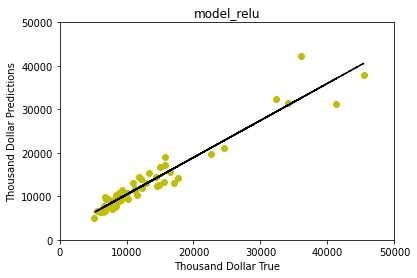

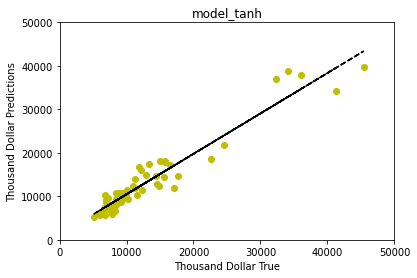

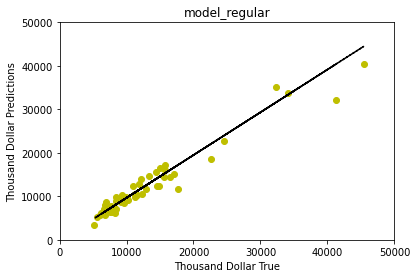

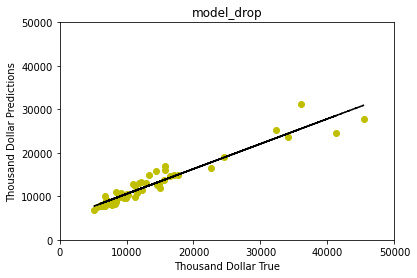

In [90]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
  list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
  plot_list.append(plotting(j,list_name[i]))